# Imports

In [1]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
import matplotlib.pyplot as plt

# Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print(X_train.shape)
print(X_test.shape )
print(y_train.shape)
print(y_test.shape )

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [3]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# normalizing the data to help with the training
X_train =X_train / 255
X_test =X_test / 255

In [6]:
# one-hot encoding using keras utilities
no_of_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, no_of_classes)
Y_test = keras.utils.to_categorical(y_test, no_of_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


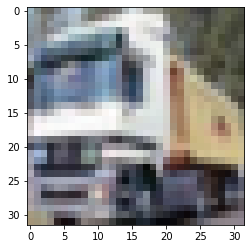

In [7]:
# Displaying an image and corresponding label
plt.imshow(X_train[1])
print(Y_train[1])

# Model

In [8]:
# Building a linear stack of layers with the sequential model
model = Sequential()

# first convolutional layer
model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# second convolutional layer followed by maxpool layer
model.add(Conv2D(filters=100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# third convolutional layer followed by maxpool layer
model.add(Conv2D(filters=150, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output obtained after third convolution and maxpooling
model.add(Flatten())

# 2 fully connected hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))


# output layer with softmax activation function 
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history=model.fit(X_train, Y_train, batch_size=200, epochs=40, validation_data=(X_test, Y_test))

Epoch 1/40
250/250 [==============================] - 22s 79ms/step - loss: 1.8018 - accuracy: 0.3245 - val_loss: 1.3414 - val_accuracy: 0.5275
Epoch 2/40
250/250 [==============================] - 19s 77ms/step - loss: 1.3030 - accuracy: 0.5326 - val_loss: 1.0377 - val_accuracy: 0.6331
Epoch 3/40
250/250 [==============================] - 19s 78ms/step - loss: 1.0858 - accuracy: 0.6194 - val_loss: 0.8863 - val_accuracy: 0.6928
Epoch 4/40
250/250 [==============================] - 19s 77ms/step - loss: 0.9694 - accuracy: 0.6653 - val_loss: 0.8433 - val_accuracy: 0.7081
Epoch 5/40
250/250 [==============================] - 19s 77ms/step - loss: 0.8814 - accuracy: 0.6986 - val_loss: 0.7599 - val_accuracy: 0.7355
Epoch 6/40
250/250 [==============================] - 19s 77ms/step - loss: 0.8103 - accuracy: 0.7206 - val_loss: 0.7369 - val_accuracy: 0.7444
Epoch 7/40
250/250 [==============================] - 19s 77ms/step - loss: 0.7490 - accuracy: 0.7425 - val_loss: 0.7229 - val_accuracy:

In [9]:
import pandas as pd

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [10]:
model.save('my_model.h5')

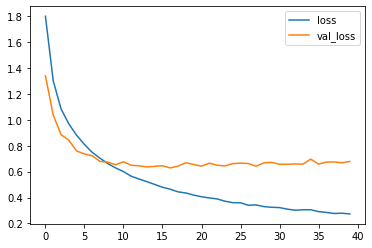

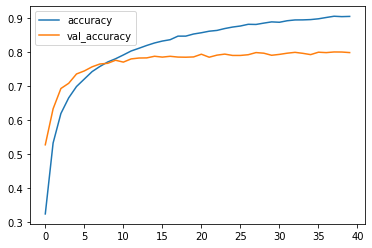

In [11]:
hist_df.loc[:, ['loss', 'val_loss']].plot()
hist_df.loc[:, ['accuracy', 'val_accuracy']].plot()